In [1]:
n = 2
m = 6
p = 1

In [2]:
(n + m/4 - 1 / 2)

3.0

$$
C_2 H_6 O_2 + 3O_2 = 2 CO_2 + 3 H_2 O 
$$

In [3]:
# cvt = 100 * 100 * 100 / 1000

In [6]:
# cvt

In [7]:
import numpy as np
import cantera as ct 
import matplotlib.pyplot as plt

In [8]:
file = '/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/merino_66_mech/Skeletal_66-SD_20161214.yaml'


In [9]:
sol_mech = ct.Solution(file)

/tmp/ipykernel_1533715/1228782169.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  sol_mech = ct.Solution(file)
/tmp/ipykernel_1533715/1228782169.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  sol_mech = ct.Solution(file)
/tmp/ipykernel_1533715/1228782169.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  sol_mech = ct.Solution(file)
/tmp/ipykernel_1533715/1228782169.py:1: UserWarning: NasaPoly2::vali

In [10]:
cvt = 1

In [56]:
# lnA, lnE = sol.x
B = 1.04e+8
T_a = 1.057e+4
s = 1.365

r = ct.Reaction(equation="C2H5OH + 3 O2 => 2 CO2 + 3 H2O", rate=ct.ArrheniusRate(B * (cvt**(s/2)) * (cvt**(s/2)) , 0, ct.gas_constant *T_a))
r.orders={
    "C2H5OH" : s/2,
    "O2" : s/2
}
sol_onestep = ct.Solution(thermo='ideal-gas', kinetics='gas',
                species=[sp for sp in sol_mech.species() if sp.name in ["C2H5OH", "CO2", "H2O", "N2", "O2"]], reactions=[r], name='my_custom_name')

In [15]:
Y_air_N2= 0.767
Y_air_O2= 0.233
Y_fuel = 0.085

In [16]:
# def model(gas, T, Y_fuel):
#     gas.TPY = T, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
#     r = ct.IdealGasConstPressureReactor(gas)
#     # r = ct.Reactor(name='adiabatic_reactor', contents=gas)
#     sim = ct.ReactorNet([r])
#     # time = 0.0
#     states = ct.SolutionArray(gas, extra=['t', 'maxrate'])
#     max_sim_time = 0.01
#     while sim.time < max_sim_time:
#         # print(sim.time) 
#         # if fixed_iter is not None:
#         #     sim.advance(sim.time + (max_sim_time/fixed_iter))
#         # else:
#         sim.step()
#         states.append(r.thermo.state, t=sim.time, maxrate=np.max(np.abs(gas.net_production_rates)))
#     return states

def solve_flame(gas, T, Y_fuel):
    gas.TPY = T, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
    f = ct.FreeFlame(gas, grid=np.linspace(0, 0.05, 30))
    f.set_refine_criteria(ratio=2, slope=0.06, curve=0.10)
    # f.transport_model = 'multicomponent' # optionally enable
    f.soret_enabled = False  # optionally enable
    f.solve(loglevel=1, auto=True)
    return f

In [17]:
# states_m_list[0].

In [18]:
T = 293

In [19]:
Y_fuels = np.linspace(0.02, 0.09, 8)

In [20]:
states_m_list = []

for Y_fuel in Y_fuels:
    states_m_list.append(solve_flame(sol_mech, T, Y_fuel))


*********** Solving on 30 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844       3.28
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      3.037
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1122      2.311
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1.278      1.411
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.0015     0.5226
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.248e-08     0.5226
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.536e-12     0.5226
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.494

In [72]:

states_os_list = []

for Y_fuel in Y_fuels:
    states_os_list.append(solve_flame(sol_onestep, T, Y_fuel))


*********** Solving on 30 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [30] point grid(s).
Expanding domain to accommodate flame thickness. New width: 0.1 m
##############################################################################
Refining grid in flame.
    New points inserted after grid points 7 8 9 10 11 12 13 14 15 16 
    to resolve C2H5OH CO2 H2O N2 O2 T velocity 
##############################################################################

*********** Solving on 40 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0005767      3.361
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02217      2.96

In [22]:
np.array(states_m_list[1].grid),

(array([0.        , 0.02758621, 0.05517241, 0.08275862, 0.11034483,
        0.13793103, 0.16551724, 0.17931034, 0.19310345, 0.20689655,
        0.2137931 , 0.22068966, 0.22758621, 0.23448276, 0.24137931,
        0.24827586, 0.25517241, 0.26206897, 0.26896552, 0.27241379,
        0.27586207, 0.27931034, 0.28275862, 0.2862069 , 0.28965517,
        0.29137931, 0.29310345, 0.29482759, 0.29655172, 0.29827586,
        0.3       , 0.30172414, 0.30344828, 0.30517241, 0.30689655,
        0.30862069, 0.31034483, 0.31206897, 0.31293103, 0.3137931 ,
        0.31465517, 0.31551724, 0.31637931, 0.31724138, 0.31810345,
        0.31853448, 0.31896552, 0.31939655, 0.31982759, 0.32025862,
        0.32068966, 0.32112069, 0.32155172, 0.32198276, 0.32241379,
        0.32284483, 0.32327586, 0.3237069 , 0.32413793, 0.32456897,
        0.325     , 0.32543103, 0.32586207, 0.3262931 , 0.32672414,
        0.32715517, 0.32758621, 0.32801724, 0.32844828, 0.32887931,
        0.32931034, 0.32974138, 0.33017241, 0.33

In [23]:
states_m_list[0].get_max_grid_points()

TypeError: get_max_grid_points() takes exactly 1 positional argument (0 given)

In [24]:
states_os_list[7].to_array()

           grid  velocity     T         D        N2  ...     CH2CH2OH      CH3CHOH      CH3CH2O
0    0.00000000  0.328372   293  1.225514  0.697970  ... -5.36410e-55 -1.31338e-54 -2.53576e-54
1    0.00172414  0.328372   293  1.225514  0.697970  ... -1.42210e-53 -3.48247e-53 -6.90168e-53
2    0.00344828  0.328372   293  1.225514  0.697970  ... -2.68467e-54 -7.08417e-54 -1.38262e-53
3    0.00517241  0.328372   293  1.225514  0.697970  ... -3.07913e-55 -8.35975e-55 -1.63383e-54
4    0.00689655  0.328372   293  1.225514  0.697970  ... -3.04512e-56 -7.13132e-56 -1.51215e-55
..          ...       ...   ...       ...       ...  ...          ...          ...          ...
99   0.04310345  2.585784  2179  0.155630  0.697693  ... -3.34007e-59  1.56005e-58  7.26580e-59
100  0.04482759  2.585784  2179  0.155630  0.697693  ... -3.26817e-59  1.54332e-58  7.26582e-59
101  0.04655172  2.585784  2179  0.155630  0.697693  ... -3.21766e-59  1.53157e-58  7.26585e-59
102  0.04827586  2.585784  2179  0.15563

ValueError: No such species 'CO'.

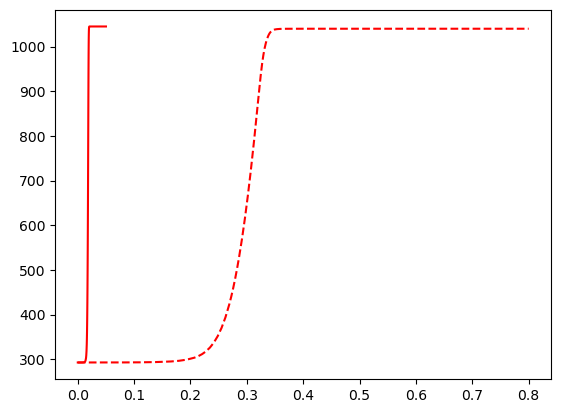

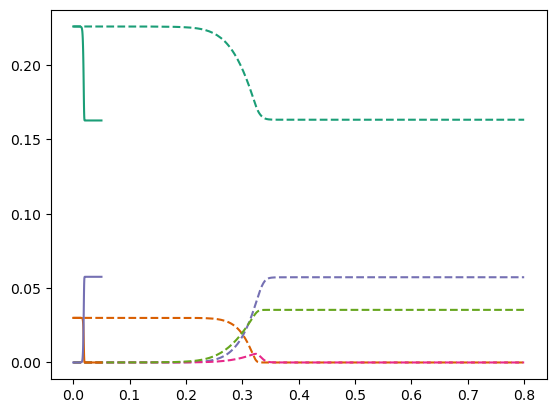

In [73]:
plt.plot(states_m_list[1].grid, states_m_list[1].T, '--', c="r")
plt.plot(states_os_list[1].grid, states_os_list[1].T, c="r")

plt.figure()
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]

cs = plt.cm.Dark2(list(range(len(spns))))



for j, i in enumerate(spns):
    i = str(i).upper()
    plt.plot(np.array(states_m_list[1].grid),  np.array(states_m_list[1].Y)[sol_mech.species_index(i)], "--", label=i, c=cs[j])

for j, i in enumerate(spns):
    i = str(i).upper()
    plt.plot(np.array(states_os_list[1].grid),  np.array(states_os_list[1].Y)[sol_onestep.species_index(i)], label=i, c=cs[j])
plt.legend()


In [26]:
states_m_list[].velocity[0]

SyntaxError: invalid syntax (3358418982.py, line 1)

In [27]:
states_m.velocity[0]

NameError: name 'states_m' is not defined

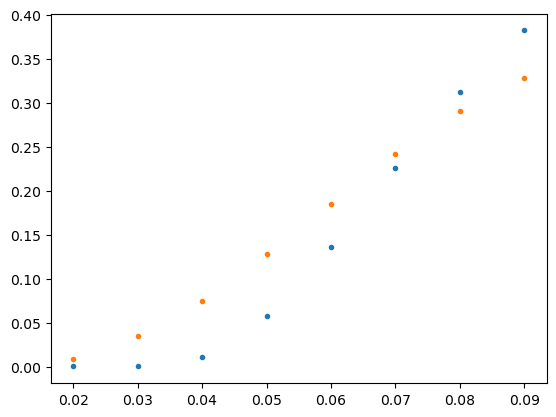

In [541]:
sol_onestep.TPY = 300, 1e5,  {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 

In [542]:
Y_fuel = 0.08
sol_onestep.TPY = 300, 1e5,  {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
Xf = sol_onestep.X[sol_onestep.species_index("C2H5OH")]
rho_u = sol_onestep.density
h1 = sol_onestep.enthalpy_mole
sol_onestep.equilibrate("HP")
deltaT_per_fuel = (sol_onestep.T - 300)/Y_fuel
rho_b = sol_onestep.density
Y_prds = sol_onestep.Y
sol_onestep.TPY = 300, 1e5,  Y_prds
h2 = sol_onestep.enthalpy_mole 

# h2 = sol_onestep.enthalpy_mole -  sol_onestep.cp_mole*sol_onestep.T 
sol_onestep.TPY = 300, 1e5,  {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
delta_H_reaction = (h2 - h1)/Xf

In [543]:
delta_H_reaction, deltaT_per_fuel


(np.float64(-1202826638.8419654), 21418.74990259597)

In [544]:
# sol_onestep.enthalpy_mass

In [545]:
c = sol_mech.cp_mass
# c = sol_mech.cp_mass
# rho = sol_mech.density
lb = sol_mech.thermal_conductivity

In [546]:
n = (s/2)

In [574]:

Y_fuel_ = np.linspace(0.01, 0.085)

# deltaT = deltaT_per_fuel*Y_fuel_
deltaT = Y_fuel_*(-delta_H_reaction/46)/c

T_ref = deltaT/2 + 300


Y_O = Y_air_O2*(1-Y_fuel_)
Y_F = Y_fuel_
Q_dot = (-delta_H_reaction) * B * (Y_F**n * Y_O**n) * np.exp(-T_a/T_ref) * (rho_b*rho_b/(28*46) )**n

# S_L = 0.07*np.sqrt(lb*Q_dot/deltaT)/rho_u/rho_b/c

S_L = 0.5*np.sqrt(lb*Q_dot/deltaT)/rho_u/rho_b/c

In [575]:
deltaT

array([ 216.48619166,  249.62183324,  282.75747482,  315.8931164 ,
        349.02875798,  382.16439956,  415.30004114,  448.43568273,
        481.57132431,  514.70696589,  547.84260747,  580.97824905,
        614.11389063,  647.24953221,  680.38517379,  713.52081537,
        746.65645695,  779.79209853,  812.92774011,  846.06338169,
        879.19902327,  912.33466485,  945.47030644,  978.60594802,
       1011.7415896 , 1044.87723118, 1078.01287276, 1111.14851434,
       1144.28415592, 1177.4197975 , 1210.55543908, 1243.69108066,
       1276.82672224, 1309.96236382, 1343.0980054 , 1376.23364698,
       1409.36928857, 1442.50493015, 1475.64057173, 1508.77621331,
       1541.91185489, 1575.04749647, 1608.18313805, 1641.31877963,
       1674.45442121, 1707.59006279, 1740.72570437, 1773.86134595,
       1806.99698753, 1840.13262911])

In [576]:
deltaT

array([ 216.48619166,  249.62183324,  282.75747482,  315.8931164 ,
        349.02875798,  382.16439956,  415.30004114,  448.43568273,
        481.57132431,  514.70696589,  547.84260747,  580.97824905,
        614.11389063,  647.24953221,  680.38517379,  713.52081537,
        746.65645695,  779.79209853,  812.92774011,  846.06338169,
        879.19902327,  912.33466485,  945.47030644,  978.60594802,
       1011.7415896 , 1044.87723118, 1078.01287276, 1111.14851434,
       1144.28415592, 1177.4197975 , 1210.55543908, 1243.69108066,
       1276.82672224, 1309.96236382, 1343.0980054 , 1376.23364698,
       1409.36928857, 1442.50493015, 1475.64057173, 1508.77621331,
       1541.91185489, 1575.04749647, 1608.18313805, 1641.31877963,
       1674.45442121, 1707.59006279, 1740.72570437, 1773.86134595,
       1806.99698753, 1840.13262911])

In [577]:
sol_mech.molecular_weights

array([28.014   , 39.95    ,  4.002602,  1.008   , 31.998   , 17.007   ,
       15.999   ,  2.016   , 18.015   , 33.006   , 28.01    , 44.009   ,
       29.018   , 15.035   , 16.043   , 30.026   , 14.027   , 14.027   ,
       28.054   , 31.034   , 29.062   , 30.07    , 34.014   , 26.038   ,
       27.046   , 43.045   , 42.037   , 31.034   , 44.053   , 43.045   ,
       46.069   , 45.061   , 45.061   , 45.061   ])

In [578]:
S_L

array([1.04132061e-04, 1.68580204e-04, 2.63507337e-04, 3.99077455e-04,
       5.87417069e-04, 8.42659086e-04, 1.18093334e-03, 1.62030572e-03,
       2.18067022e-03, 2.88359989e-03, 3.75216367e-03, 4.81071690e-03,
       6.08467282e-03, 7.60026264e-03, 9.38429067e-03, 1.14638906e-02,
       1.38662879e-02, 1.66185729e-02, 1.97474868e-02, 2.32792253e-02,
       2.72392586e-02, 3.16521720e-02, 3.65415246e-02, 4.19297291e-02,
       4.78379500e-02, 5.42860200e-02, 6.12923754e-02, 6.88740067e-02,
       7.70464254e-02, 8.58236443e-02, 9.52181709e-02, 1.05241012e-01,
       1.15901689e-01, 1.27208260e-01, 1.39167353e-01, 1.51784204e-01,
       1.65062696e-01, 1.79005414e-01, 1.93613689e-01, 2.08887658e-01,
       2.24826317e-01, 2.41427579e-01, 2.58688336e-01, 2.76604512e-01,
       2.95171129e-01, 3.14382359e-01, 3.34231584e-01, 3.54711456e-01,
       3.75813946e-01, 3.97530401e-01])

In [579]:
Y_fuel

0.08

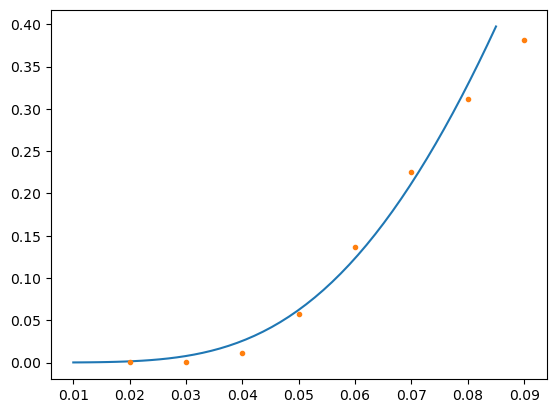

In [580]:
plt.plot(Y_fuel_, S_L)
plt.plot(Y_fuels, [s.velocity[0] for s in states_m_list], ".")
# plt.plot(Y_fuels, [s.velocity[0] for s in states_os_list], ".")

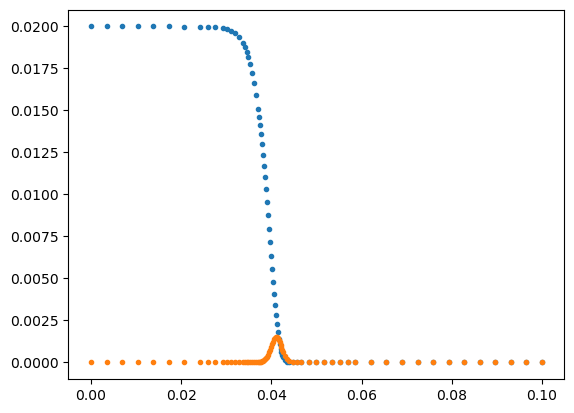

In [581]:
plt.plot(states_os_list[0].grid, states_os_list[0].Y[4], ".")
plt.plot(states_os_list[0].grid, states_os_list[0].net_rates_of_progress[0], ".")

In [35]:
states_os_list[0].net_rates_of_progress

In [278]:
sensitivities_0 = np.array([np.power(s.get_flame_speed_reaction_sensitivities(), 2) for s in states_m_list])

In [364]:
net_prd_rates_0 = np.array([np.max(np.power(s.net_rates_of_progress, 2), axis=1) for s in states_m_list])

In [365]:
net_prd_rates_0 /= np.std(net_prd_rates_0, axis=1).reshape(-1, 1)

In [366]:
# np.mean(net_prd_rates_0, axis=1)

In [371]:
sensitivities = sensitivities_0[:, np.max(sensitivities_0, axis=0) > 0.005]

In [386]:
net_prd_rates = net_prd_rates_0[:, np.max(net_prd_rates_0, axis=0) < 0.2]

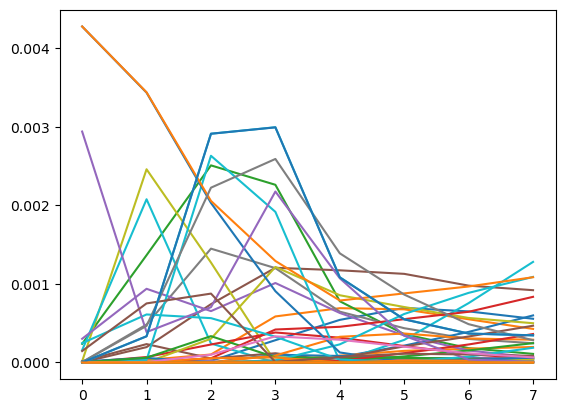

In [387]:
for i in range(sensitivities.shape[1]):
    plt.plot(sensitivities[:, i])

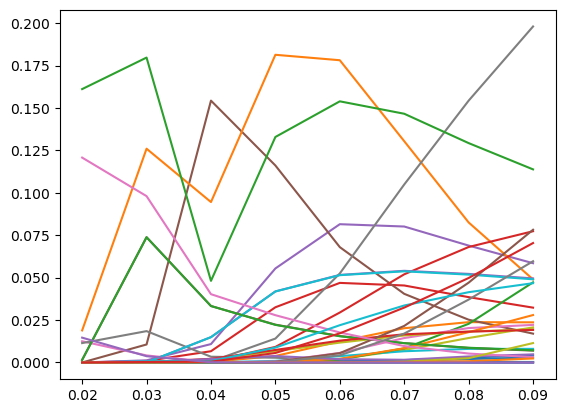

In [388]:
for i in range(net_prd_rates.shape[1]):
    plt.plot(Y_fuels, net_prd_rates[:, i])

In [389]:
net_prd_rates.shape

(8, 35)

In [384]:
np.array(sol_mech.reactions())[np.max(sensitivities_0, axis=0) > 0.001]

array([H + O2 <=> O + OH    <Arrhenius>, H2O + O <=> 2 OH    <Arrhenius>,
       H + OH + M <=> H2O + M    <three-body-Arrhenius>,
       H + O2 (+M) <=> HO2 (+M)    <falloff-Troe>,
       H + HO2 <=> 2 OH    <Arrhenius>, H + HO2 => H2 + O2    <Arrhenius>,
       HO2 + O => O2 + OH    <Arrhenius>,
       HO2 + OH <=> H2O + O2    <Arrhenius>,
       HO2 + OH <=> H2O + O2    <Arrhenius>,
       2 OH (+M) <=> H2O2 (+M)    <falloff-Troe>,
       2 HO2 => H2O2 + O2    <Arrhenius>,
       2 HO2 => H2O2 + O2    <Arrhenius>,
       H2O2 + OH => H2O + HO2    <Arrhenius>,
       H2O2 + OH => H2O + HO2    <Arrhenius>,
       CO + OH <=> CO2 + H    <Arrhenius>,
       HCO + M => CO + H + M    <three-body-Arrhenius>,
       HCO + O2 => CO + HO2    <Arrhenius>,
       CH2O + O => HCO + OH    <Arrhenius>,
       CH3 + OH <=> H2O + S-CH2    <Arrhenius>,
       CH3 + O => CH2O + H    <Arrhenius>,
       CH3 + HO2 => CH3O + OH    <Arrhenius>,
       CH3 + H (+M) => CH4 (+M)    <falloff-Troe>,
       C2H

In [296]:
# np.max(states_m_list[0].net_production_rates, axis=0)

(119,)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.42929995e-13,
       -3.45182314e-24,  2.68310233e-12,  8.17924970e-13,  1.86012317e-09,
        3.98206673e-07,  1.37944556e-10,  1.94136435e-07,  1.82071398e-07,
        2.69584767e-13,  1.15167936e-12,  4.97030012e-13,  2.24929260e-08,
        2.48482156e-22,  6.87909368e-18,  4.30150943e-08,  2.59876213e-15,
        5.71371886e-13,  2.35112173e-11,  9.13505733e-09,  1.78648142e-16,
        1.69337926e-14,  2.21121306e-14,  3.02556700e-10,  2.52455308e-15,
        2.02403553e-08,  7.26625005e-14,  2.75340661e-17,  1.44940642e-13,
        2.66409794e-14,  4.23355042e-14])